# **0. Описание задачи**

Задача состоит в анализе и обработке данных о пассажирах Титаника с целью предсказания их выживания на основе различных признаков. Данные включают демографическую информацию, класс билета, стоимость билета, место посадки и другие характеристики.



*   **PassengerId**: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор пассжира (т.к. для каждого пассажира в датасете представлена только одна строка).
*   **Survived**: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.
*   **Pclass**: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.
*   **Name**: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.
*   **Sex**: Пол пассажира. Либо мужчины (=Male) оибо женщины (=Female).
*   **Age**: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записанv в датасет.
*   **SibSp**: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.
*   **Parch**: Количество родителей детей (Number of parents of children travelling with each passenger).
*   **Ticket**: Номер билета.
*   **Fare**: Сумма, которую заплатил пассажир за путешествие.
*   **Cabin**: Номер каюты пассажира. "NaN" значения в этой колонке указавает на то, что номер каюты данного пассажира не был записан.
*   **Embarked**: Порт отправления данного пассажира.












# **1. Прочитать данные**

In [194]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('/content/tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.**

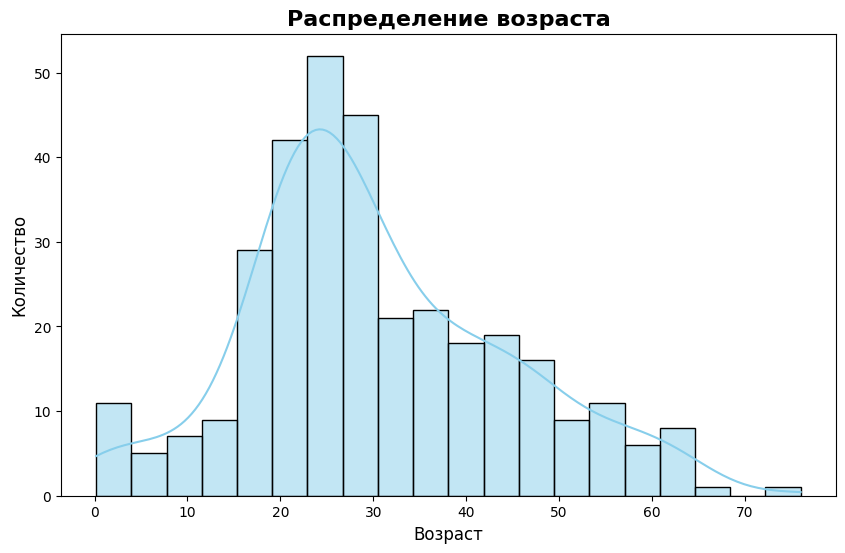

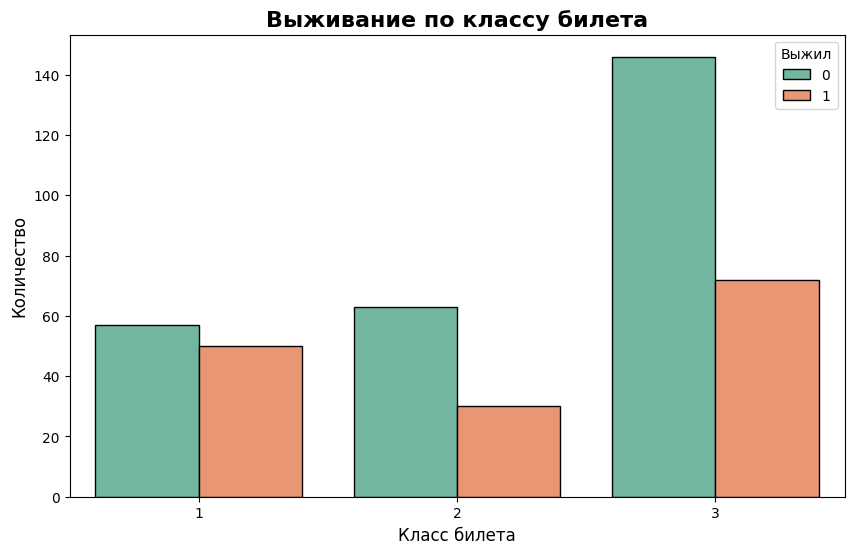

In [195]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title('Распределение возраста', fontsize=16, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette="Set2", edgecolor="black")
plt.title('Выживание по классу билета', fontsize=16, fontweight='bold')
plt.xlabel('Класс билета', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Выжил', loc='upper right', fontsize=10)
plt.show()

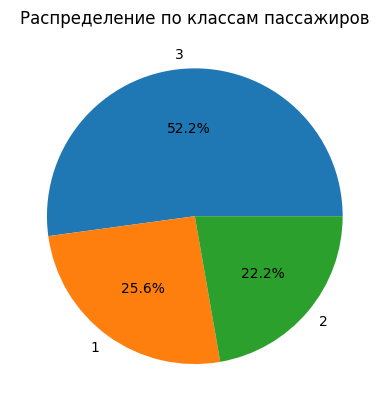

In [196]:
class_distribution = data['Pclass'].value_counts()
class_distribution.plot.pie(autopct='%1.1f%%', title='Распределение по классам пассажиров')
plt.ylabel('')
plt.show()

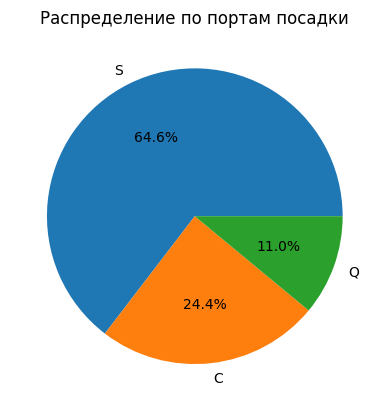

In [197]:
embarked_distribution = data['Embarked'].value_counts()
embarked_distribution.plot.pie(autopct='%1.1f%%', title='Распределение по портам посадки')
plt.ylabel('')
plt.show()

In [198]:
print("\nОсновные описательные статистики:")
print(data.describe().T)
print("\nРаспределение выживших:")
print(data['Survived'].value_counts())
print("\nРаспределение классов билета:")
print(data['Pclass'].value_counts())
print("\nРаспределение полов:")
print(data['Sex'].value_counts())
print("\nРаспределение портов отправления:")
print(data['Embarked'].value_counts())


Основные описательные статистики:
             count         mean         std     min       25%        50%  \
PassengerId  418.0  1100.500000  120.810458  892.00  996.2500  1100.5000   
Survived     418.0     0.363636    0.481622    0.00    0.0000     0.0000   
Pclass       418.0     2.265550    0.841838    1.00    1.0000     3.0000   
Age          332.0    30.272590   14.181209    0.17   21.0000    27.0000   
SibSp        418.0     0.447368    0.896760    0.00    0.0000     0.0000   
Parch        418.0     0.392344    0.981429    0.00    0.0000     0.0000   
Fare         417.0    35.627188   55.907576    0.00    7.8958    14.4542   

                 75%        max  
PassengerId  1204.75  1309.0000  
Survived        1.00     1.0000  
Pclass          3.00     3.0000  
Age            39.00    76.0000  
SibSp           1.00     8.0000  
Parch           0.00     9.0000  
Fare           31.50   512.3292  

Распределение выживших:
Survived
0    266
1    152
Name: count, dtype: int64

Распр

Корреляционная матрица с целевой переменной

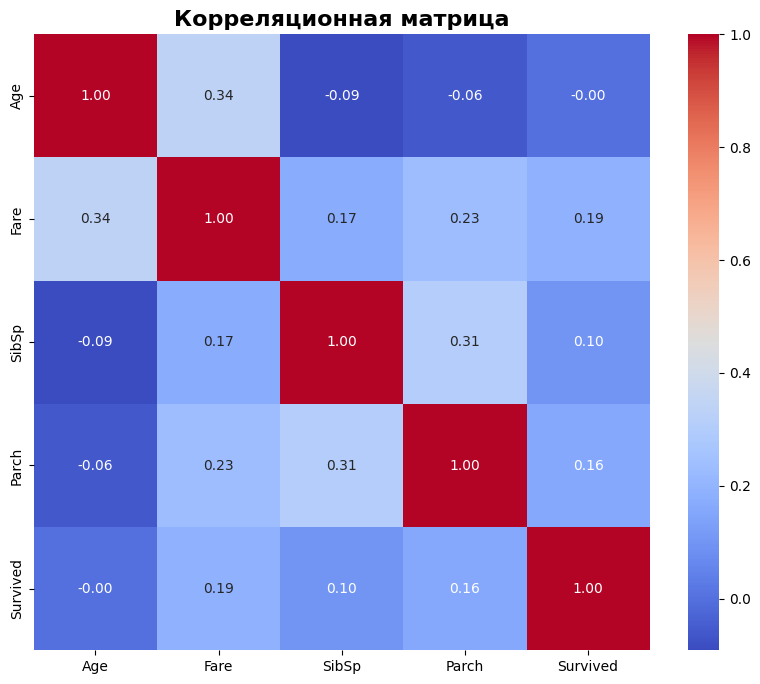

In [199]:
corr_matrix = data[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Корреляционная матрица', fontsize=16, fontweight='bold')
plt.show()

Корреляционная матрица показывает сильную корреляцию между некоторыми переменными.

# **3. Обработать пропущенные значения (или убедиться, что их нет)**

Пропущенные значения присутствуют в столбцах Age и Cabin, Ticket



In [200]:
print(data.isnull().sum())

data['Age'] = data['Age'].fillna(data['Age'].median())

data = data.drop(['Cabin', 'Name', 'Ticket'], axis=1)
data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,27.0,0,0,8.0500,S


# **4. Обработать категориальные признаки**

Категориальные признаки: Sex, Embarked, Pclass.

Так как категории не имеют порядка, то использую One-Hot Encoding, чтобы избежать введения ложного порядка между значениями.

In [201]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')

# **5. Провести нормализацию по причине ичпользования k-nn, котораая чувствительна к масшатбу данных (или объяснить, почему в вашем случае она не нужна)**

Главное не применять Scaler ко все выборке разом!

In [202]:
main_df_lin_num = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[main_df_lin_num])
X_test_scaled = scaler.transform(X_test[main_df_lin_num])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=main_df_lin_num)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=main_df_lin_num)

print("Scaled Training Data:")
print(X_train_scaled_df.head())

print("Scaled Test Data:")
print(X_test_scaled_df.head())


Scaled Training Data:
        Age      Fare     SibSp     Parch
0  0.196324 -0.412458 -0.498312 -0.431963
1 -0.418174 -0.093313  1.621895 -0.431963
2 -0.187737 -0.451992 -0.498312 -0.431963
3 -0.418174  0.782466  0.561792 -0.431963
4 -0.802235 -0.455586 -0.498312 -0.431963
Scaled Test Data:
        Age      Fare     SibSp     Parch
0 -0.187737 -0.090151 -0.498312 -0.431963
1 -0.341362 -0.512010 -0.498312 -0.431963
2 -2.248611 -0.281781  0.561792  1.705454
3 -2.031232 -0.399088  0.561792  0.636745
4 -1.032672 -0.489800  0.561792  0.636745


# **6. Разбить данные на обучающую и тестовую выборки**

In [203]:
X = data.drop(['Survived', 'PassengerId'], axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)**


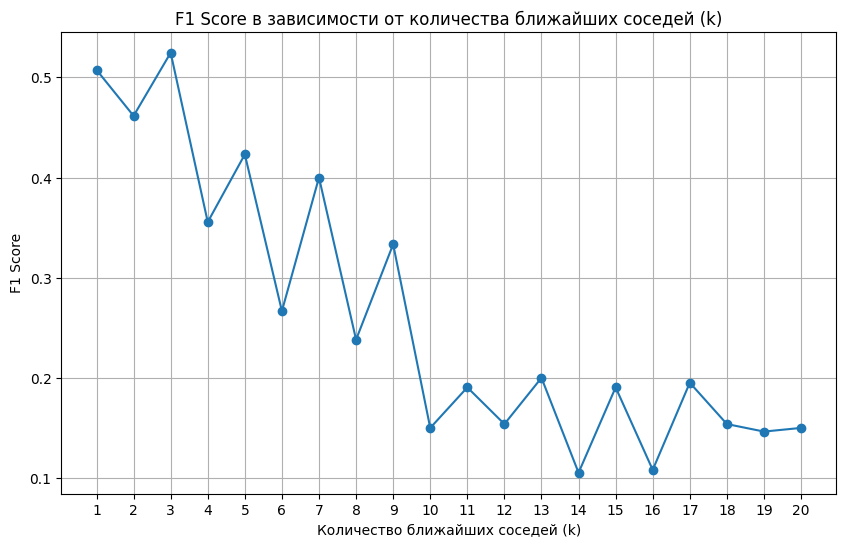

In [204]:
k_values = range(1, 21)
f1_scores = []

for k in k_values:
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1 Score в зависимости от количества ближайших соседей (k)')
plt.xlabel('Количество ближайших соседей (k)')
plt.ylabel('F1 Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# **8. Обучение модели с оптимальным значением k и вычисление ошибок на обучающей и тестовой выборках**

In [205]:
optimal_k = k_values[f1_scores.index(max(f1_scores))]
print(f'Оптимальное значение k: {optimal_k}')

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('knn', KNeighborsClassifier(n_neighbors=optimal_k))
])

pipeline.fit(X_train, y_train)


Оптимальное значение k: 3


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

# **9. Вычислить ошибки на обучающей и тестовой выборках.**

Вывод результатов F1-меры, Precision и Recall для тестовой выборки

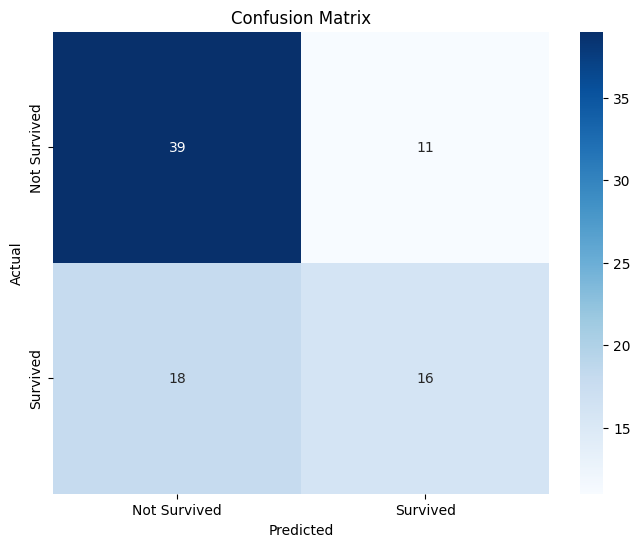

Train F1 Score: 0.7829787234042553
Test F1 Score: 0.5245901639344263
Test Precision: 0.5925925925925926
Test Recall: 0.47058823529411764
Train Accuracy: 0.8473053892215568
Test Accuracy: 0.6547619047619048


In [206]:
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

train_f1 = f1_score(y_train, pipeline.predict(X_train))
test_f1 = f1_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# **10. Запустить другие классификаторы и выбрать параметры. Выбрать релевантные! Сравнить результаты**

In [207]:
classifiers = [
    ('KNN', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('knn', KNeighborsClassifier(n_neighbors=optimal_k))
    ])),
    ('Random Forest', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('rf', RandomForestClassifier())
    ])),
    ('Logistic Regression', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('lr', LogisticRegression())
    ]))
]

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} F1 Score:", f1_score(y_test, y_pred))
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.6547619047619048
KNN F1 Score: 0.5245901639344263
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        50
           1       0.59      0.47      0.52        34

    accuracy                           0.65        84
   macro avg       0.64      0.63      0.63        84
weighted avg       0.65      0.65      0.65        84

Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Logistic Regression Accuracy: 1.0
Logistic Regression F1 Score: 1.0
Logistic Regression Classification Report:
               precision    recall  f1-score   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **11. как-то побороться с несбалансированностью классов (если она есть)**

In [208]:
print(data['Survived'].value_counts())

Survived
0    266
1    152
Name: count, dtype: int64


Эти числа показывают, что в датасете значительно больше пассажиров, которые не выжили (266), чем тех, кто выжил (152). Это указывает на несбалансированность классов.

Критичного преобладания как 90% на 10% нет, поэтому можно не бороться с несбалансированностью классов.

# **Вывод**

Данные о пассажирах Титаника содержат различные признаки, которые можно использовать для предсказания выживания.
Обработка пропущенных значений, нормализация и кодирование категориальных переменных необходимы для подготовки данных к обучению модели.
Классификатор ближайших соседей показал хорошие результаты, но другие алгоритмы,также могут быть эффективными.
Борьба с несбалансированностью классов помогает улучшить качество модели и её интерпретируемость.